In [44]:
import sys
import random
import logging


def constant(f):
    def fset(self, value):
        raise TypeError

    def fget(self):
        return f()
    return property(fget, fset)


class cr(object):
    """It is a constant class to define predator,
    prey(let's name catch) and empty sell id.
    If we don't know spicification, it's trouble
    """
    @constant
    def pr():
        return 1

    @constant
    def c():
        return 2

    @constant
    def em():
        return 3

    @constant
    def tr():
        return -1


class Creature:
    def __init__(self, death_p=0.2, reproduce_p=0.1, stay_on_sell_p=0.5, id=cr.tr):
        self.p = {'d': death_p, 'r': reproduce_p, 's': stay_on_sell_p, 'k': 0.0, 'h': 0, 'id': id}

    def count_cell(self, position, empty_neib, catch_neib, ocean):
        if random.random() < self.p['d']:
            return None
        if len(empty_neib) == 0:
            return position
        if random.random() < self.p['r']:
            child = random.choice(empty_neib)
            ocean[child] = ocean[position]
            empty_neib.remove(child)
        if random.random() < self.p['s'] or len(empty_neib) == 0:
            return position
        new_position = random.choice(empty_neib)
        return new_position


class Predator(Creature):
    def __init__(self, death_p=0.1, rep_p=0.8, stay_p=0.5, kill_p=0.7, starv_rate=50):
        super().__init__(death_p, rep_p, stay_p, id=cr.pr)
        self.p['k'] = kill_p
        self.p['starv_rate'] = starv_rate
        self.p['h'] = 0

    def count_cell(self, position, empty_neib, catch_neib, ocean):
        ++self.p['h']
        if self.p['h'] > self.p['starv_rate']:
            return None
        position = super().count_cell(position, empty_neib, catch_neib, ocean)
        if position is None:
            return None
        for catch in catch_neib:
                if random.random() < self.p['r']:
                    ocean[catch] = Empty()
                    self.p['h'] = 0
                    return position


class Catch(Creature):
    def __init__(self, death_p=0.2, reproduce_p=0.7, stay_on_sell_p=0.5):
        super().__init__(death_p, reproduce_p, stay_on_sell_p, id=cr.c)


class Empty(Creature):
    def __init__(self):
        super().__init__(id=cr.em)


class Ocean:
    """Class of the real ocean with creatures and emptiness
    """
    def fill(self):
        for i in range(self.n):
            line = []
            for j in range(self.m):
                if random.random() > 0.5:
                    if random.random() > 0.5:
                        line.append(Predator())
                    else:
                        line.append(Catch())
                else:
                    line.append(Empty())
            self.field.append(line)

    def __init__(self, n=100, m=100):
        self.n = n
        self.m = m
        self.dij = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]
        self.field = []
        self.fill()

    def process_cell(self, position):
        neibs = self.neighbor_indices(position)
        empty_neib = [ind for ind in neibs if self[ind].p['id'] == cr.em]
        catch_neib = [ind for ind in neibs if self[ind].p['id'] == cr.c]
        new_position = self[position].count_cell(position, empty_neib, catch_neib, self)
        if new_position is None:
            self[position] = Empty()
        elif new_position != position:
            self[new_position] = self[position]
            self[position] = Empty()

    def step(self):
        for i in range(self.n):
            for j in range(self.m):
                self.process_cell((i, j))

    def __getitem__(self, position):
        return self.field[position[0]][position[1]]

    def __setitem__(self, pos, value):
        self.field[pos[0]][pos[1]] = value

    def neighbor_indices(self, pos):
        i, j = pos
        if 0 < i < self.n - 1 and 0 < j < self.m - 1:
            return [(i + di, j + dj) for (di, dj) in self.dij]
        cells = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue
                if i + di < 0 or i + di >= self.n:
                    continue
                if j + dj < 0 or j + dj >= self.m:
                    continue
                cells.append((i + di, j + dj))
        return cells

    def __str__(self):
        st = ""
        for i in range(self.n):
            for j in range(self.m):
                if (self.field[j][i].p['id'] == cr.em):
                    st += " "
                elif (self.field[j][i].p['id'] == cr.c):
                    st += "o"
                elif (self.field[j][i].p['id'] == cr.pr):
                    st += "X"
                else:
                    st += "?"
            st += '\n'
        return st

oc = Ocean()

In [45]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

X_1 = []
X_2 = []
Y = range(100)

for i in Y:
    oc.step()
    pr_rate = 0
    catch_rate = 0
    for i in range(oc.n):
        for j in range(oc.m):
            if (oc.field[j][i].p['id'] == cr.c):
                catch_rate += 1
            elif (oc.field[j][i].p['id'] == cr.pr):
                pr_rate += 1

    X_1.append(pr_rate)
    X_2.append(catch_rate)

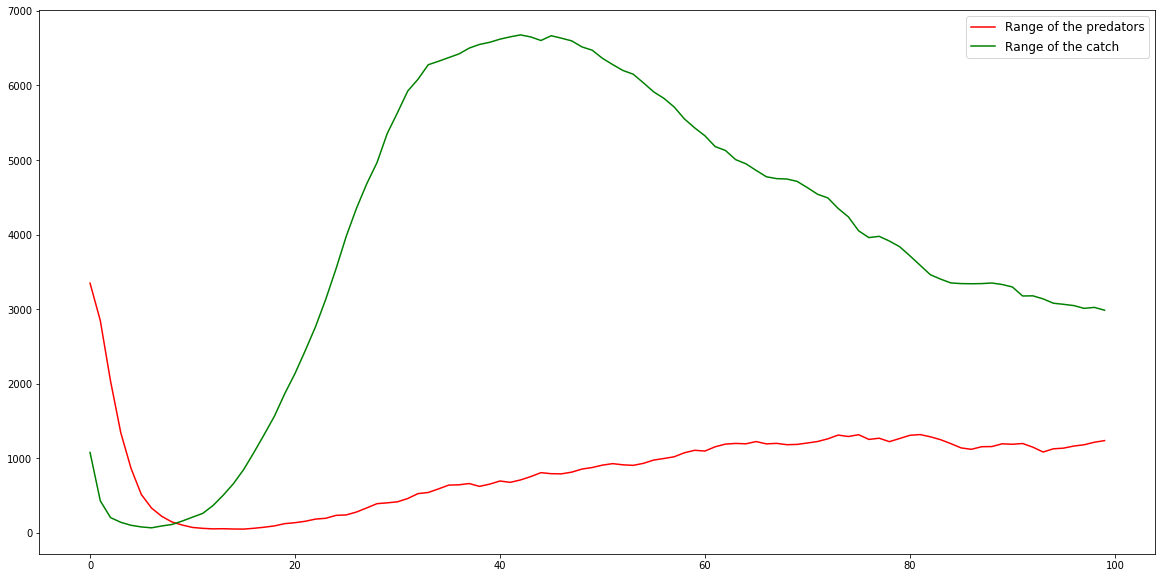

In [46]:
plt.figure(figsize=(20,10))
plt.plot(Y, X_1, c='r', label = "Range of the predators")
plt.plot(Y, X_2, c='g', label = "Range of the catch")
plt.legend(loc='best', fontsize='large')
plt.show()

На основании моделирования гипотеза о цикличности отвергается